<a href="https://colab.research.google.com/github/mag381/AI/blob/main/05_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd
import itertools

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression # 直線で境界を決める
from sklearn.svm import LinearSVC  # 線形サポート・ベクトル・マシン
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import make_circles

In [ ]:
from google.colab import files     #2 PC上のファイルを選択して、
uploaded=files.upload()            #2 Colab上のに読み込んでいる。（上の行とセットで使う）
f_name = list(uploaded.keys())[0]  #2 上の行で選択したファイル名を f_nameに代入する
# breast.csv  を選択する

Saving breast.csv to breast.csv


In [ ]:
df= pd.read_csv(f_name) 

In [ ]:
print(len(df))
print(len(df.columns))
display(df.head())
# 31種類の変数が569組あるデータセット
# 一番右端の y が正解値（0：悪性、1：良性）

569
31


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# 説明変数2つと目的変数 y を選択して、df1にコピー
df1=df[["mean radius", "mean texture", "y"]]  
# df1 の各変数毎の統計値を表示
display(df1.describe())

,mean radius,mean texture,y
count,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.627417
std,3.524049,4.301036,0.483918
min,6.981000,9.710000,0.000000
25%,11.700000,16.170000,0.000000
50%,13.370000,18.840000,1.000000
75%,15.780000,21.800000,1.000000
max,28.110000,39.280000,1.000000


In [ ]:
df1.corr()

,mean radius,mean texture,y
mean radius,1.000000,0.323782,-0.730029
mean texture,0.323782,1.000000,-0.415185
y,-0.730029,-0.415185,1.000000


In [ ]:
print(df1["y"].unique())  # 0:bad, 1:good

[0 1]


In [ ]:
print(len(df1.loc[df1["y"]==0])) # yに0が入っているデータ数
print(len(df1.loc[df1["y"]==1])) # yに1が入っているデータ数


212
357


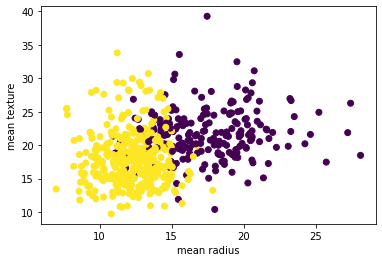

In [ ]:
plt.scatter(df1["mean radius"], df1["mean texture"], c=df1["y"])
plt.xlabel("mean radius")
plt.ylabel("mean texture")
plt.show()

データ加工

In [ ]:
x=df1[["mean radius","mean texture"]]
y = df1["y"]
display(x.head())
display(y.head())

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(len(x_train))
display(x_train.head())
print(len(x_test))
display(x_test.head())

398


,mean radius,mean texture
478,11.490,14.59
303,10.490,18.61
155,12.250,17.94
186,18.310,18.58
101,6.981,13.43


171


,mean radius,mean texture
512,13.40,20.52
457,13.21,25.25
439,14.02,15.66
298,14.26,18.17
37,13.03,18.42


In [ ]:
sca = StandardScaler()                           # 平均が0、標準偏差が1
x_train_sca = sca.fit_transform(x_train)         # になるように変換
x_test_sca = sca.fit_transform(x_test)
print(x_train_sca[:3])
print(x_test_sca[:3])

[[-0.74998027 -1.09978744]
 [-1.02821446 -0.1392617 ]
 [-0.53852228 -0.29934933]]
[[-0.17715788  0.22140254]
 [-0.23403396  1.26339611]
 [ 0.00843776 -0.84922934]]


ロジスティック回帰<br>
回帰分析により、分類確率を求め、閾値の上か下かで分類する

In [ ]:
log_r = LogisticRegression(random_state=0).fit(x_train_sca, y_train)
y_train_yosoku = log_r.predict(x_train_sca)
y_test_yosoku = log_r.predict(x_test_sca)

In [ ]:
print(y_train_yosoku[:5])
print(y_test_yosoku[:5])

[1 1 1 0 1]
[1 1 1 1 1]


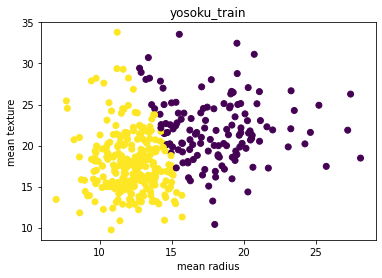

In [ ]:
plt.scatter(x_train["mean radius"],x_train["mean texture"], c=y_train_yosoku)
plt.title("yosoku_train")
plt.xlabel("mean radius")
plt.ylabel("mean texture")
plt.show()

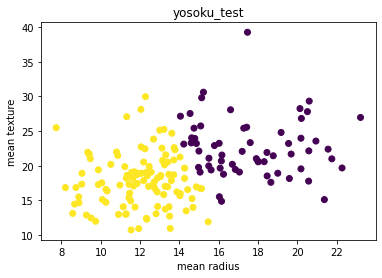

In [ ]:
plt.scatter(x_test["mean radius"],x_test["mean texture"], c=y_test_yosoku)
plt.title("yosoku_test")
plt.xlabel("mean radius")
plt.ylabel("mean texture")
plt.show()

In [ ]:
from mlxtend.plotting import plot_decision_regions as plt_dr

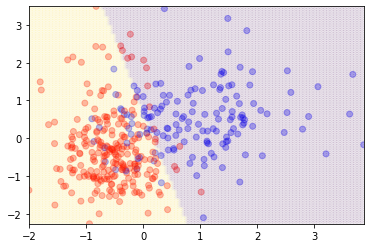

In [ ]:
#V描画の準備
color = {0: 'blue', 1: 'red'}
colors = list(map(lambda x: color[x], y_train))
X = x_train_sca[:, 0]
Y = x_train_sca[:, 1]
# 描画
plt.scatter(X, Y, c=colors, alpha=0.3)
grid = np.meshgrid(np.linspace(X.min(), X.max(), 100), np.linspace(Y.min(), Y.max(), 100))
Z = log_r.predict(np.c_[grid[0].flatten(), grid[1].flatten()])
plt.pcolormesh(grid[0], grid[1], Z.reshape(grid[0].shape), alpha=0.05, shading='gouraud')
plt.show()
# 縦軸、横軸の値は標準化した値である点に注意

線形サポートベクターマシン（SVM: Support Vector Machine) <br>

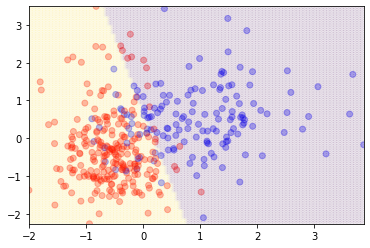

In [ ]:
# 線形サポートベクターマシンの学習
lin_svm = LinearSVC(random_state=0).fit(x_train_sca, y_train)

#境界描画
plt.scatter(X, Y, c=colors, alpha=0.3)
grid = np.meshgrid(np.linspace(X.min(), X.max(), 100), np.linspace(Y.min(), Y.max(), 100))
Z = lin_svm.predict(np.c_[grid[0].flatten(), grid[1].flatten()])
plt.pcolormesh(grid[0], grid[1], Z.reshape(grid[0].shape), alpha=0.05, shading='gouraud')
plt.show()

カーネルSVMモデル<br>
境界を直線以外の曲線で設定できる

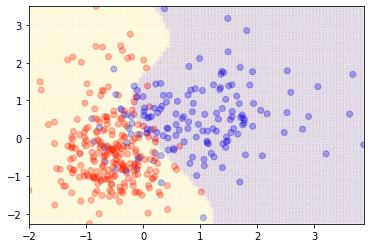

In [ ]:
kn_svm = SVC(kernel="rbf", random_state=0).fit(x_train_sca, y_train)
#境界描画
plt.scatter(X, Y, c=colors, alpha=0.3)
grid = np.meshgrid(np.linspace(X.min(), X.max(), 100), np.linspace(Y.min(), Y.max(), 100))
Z = kn_svm.predict(np.c_[grid[0].flatten(), grid[1].flatten()])
plt.pcolormesh(grid[0], grid[1], Z.reshape(grid[0].shape), alpha=0.05, shading='gouraud')
plt.show()

k近傍法<br>
周囲のk個のデータがどちらに分類されるかを多数決で決める<br>


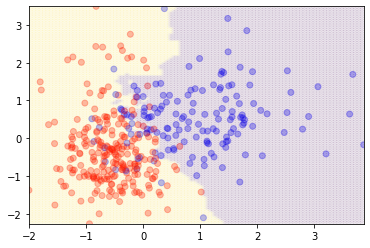

In [ ]:
kn_cf = KNeighborsClassifier(n_neighbors=5, p=2).fit(x_train_sca, y_train)
# p:1 ユークリッド距離、p:2 マンハッタン距離
#境界描画
plt.scatter(X, Y, c=colors, alpha=0.3)
grid = np.meshgrid(np.linspace(X.min(), X.max(), 100), np.linspace(Y.min(), Y.max(), 100))
Z = kn_cf.predict(np.c_[grid[0].flatten(), grid[1].flatten()])
plt.pcolormesh(grid[0], grid[1], Z.reshape(grid[0].shape), alpha=0.05, shading='gouraud')
plt.show()

決定木モデル

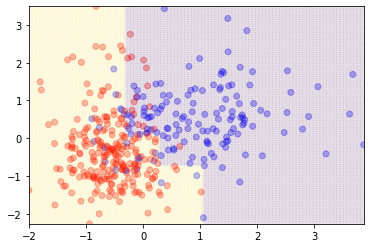

In [ ]:
t_cls = DecisionTreeClassifier(max_depth=3, random_state=0).fit(x_train_sca, y_train)
#境界描画
plt.scatter(X, Y, c=colors, alpha=0.3)
grid = np.meshgrid(np.linspace(X.min(), X.max(), 100), np.linspace(Y.min(), Y.max(), 100))
Z = t_cls.predict(np.c_[grid[0].flatten(), grid[1].flatten()])
plt.pcolormesh(grid[0], grid[1], Z.reshape(grid[0].shape), alpha=0.05, shading='gouraud')
plt.show()

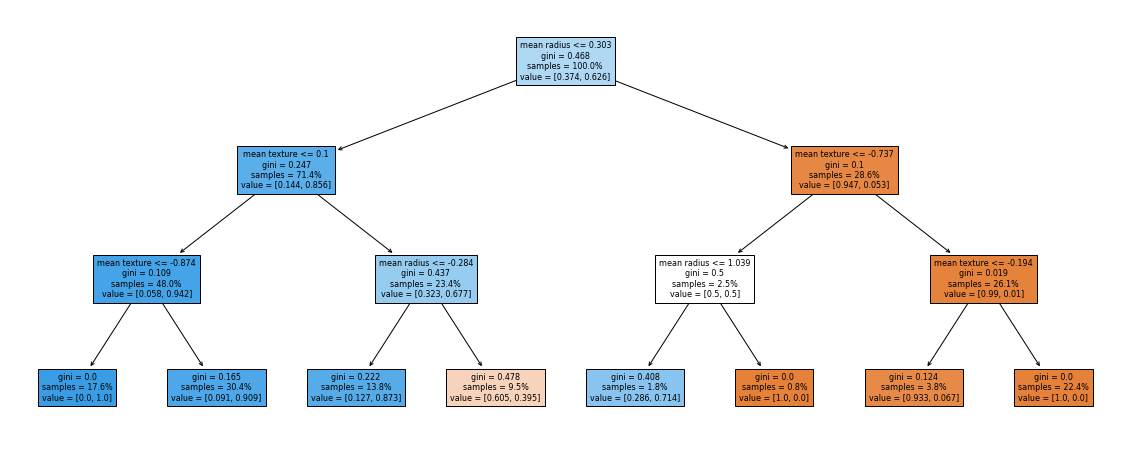

In [ ]:
plt.figure(figsize=(20,8))
tree.plot_tree(t_cls,feature_names=["mean radius","mean texture"],filled=True, proportion=True, fontsize=8)
plt.show()

ランダムフォレスト

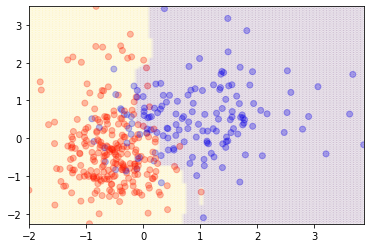

In [ ]:
rf_cls  = RandomForestClassifier(max_depth=3,random_state=0).fit(x_train_sca, y_train)
#境界描画
plt.scatter(X, Y, c=colors, alpha=0.3)
grid = np.meshgrid(np.linspace(X.min(), X.max(), 100), np.linspace(Y.min(), Y.max(), 100))
Z = rf_cls.predict(np.c_[grid[0].flatten(), grid[1].flatten()])
plt.pcolormesh(grid[0], grid[1], Z.reshape(grid[0].shape), alpha=0.05, shading='gouraud')
plt.show()

In [ ]:
# ランダムフォレストを評価する
y_train_yosoku = rf_cls.predict(x_train)
y_test_yosoku = rf_cls.predict(x_test)
print(f"Train Data Accuracy正解率：{accuracy_score(y_train,y_train_yosoku)}")
print(f"Test Data Accuracy正解率：{accuracy_score(y_test,y_test_yosoku)}")

Train Data Accuracy正解率：0.9195979899497487
Test Data Accuracy正解率：0.8888888888888888


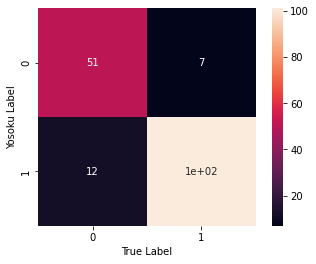

In [ ]:
matrix=confusion_matrix(y_test,y_test_yosoku)
sns.heatmap(matrix.T,square=True,annot=True)
plt.xlabel("True Label")
plt.ylabel("Yosoku Label")
plt.show()

In [ ]:
# 適合率（precision）

print(f"Train Data Precision適合率：{precision_score(y_train,y_train_yosoku,pos_label=0)}")
print(f"Test Data Precision適合率：{precision_score(y_test,y_test_yosoku,pos_label=0)}")

Train Data Precision適合率：0.9534883720930233
Test Data Precision適合率：0.8793103448275862


In [ ]:
# 再現率（recall）
print(f"Train Data Recall再現率：{recall_score(y_train,y_train_yosoku,pos_label=0)}")
print(f"Test Data Recall再現率：{recall_score(y_test,y_test_yosoku,pos_label=0)}")

Train Data Recall再現率：0.825503355704698
Test Data Recall再現率：0.8095238095238095


In [ ]:
# F1値
print(f"Train Data F1値：{f1_score(y_train,y_train_yosoku,pos_label=0)}")
print(f"Test Data F1値：{f1_score(y_test,y_test_yosoku,pos_label=0)}")

Train Data F1値：0.8848920863309353
Test Data F1値：0.8429752066115702


In [ ]:
#　評価指標をまとめて表示
print("Train Data Score")
print(classification_report(y_train,y_train_yosoku))
print("Test Data Score")
print(classification_report(y_test,y_test_yosoku))

Train Data Score
              precision    recall  f1-score   support

           0       0.95      0.83      0.88       149
           1       0.90      0.98      0.94       249

    accuracy                           0.92       398
   macro avg       0.93      0.90      0.91       398
weighted avg       0.92      0.92      0.92       398

Test Data Score
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        63
           1       0.89      0.94      0.91       108

    accuracy                           0.89       171
   macro avg       0.89      0.87      0.88       171
weighted avg       0.89      0.89      0.89       171



In [ ]:
yosoku_kakuritu_train=rf_cls.predict_proba(x_train)
yosoku_kakuritu_test=rf_cls.predict_proba(x_test)
print(yosoku_kakuritu_train[:5])
print(yosoku_kakuritu_test[:5])

[[0.02592192 0.97407808]
 [0.09656751 0.90343249]
 [0.09158286 0.90841714]
 [0.89796431 0.10203569]
 [0.01416888 0.98583112]]
[[0.4094982  0.5905018 ]
 [0.43246982 0.56753018]
 [0.15599818 0.84400182]
 [0.20438491 0.79561509]
 [0.10739119 0.89260881]]


In [ ]:
precision, recall, thresholds=precision_recall_curve(y_test,yosoku_kakuritu_test[:,0],pos_label=0)
print(precision[:5])
print(recall[:5])
print(thresholds[:5])

[0.36842105 0.37951807 0.38650307 0.39622642 0.40127389]
[1. 1. 1. 1. 1.]
[0.01416888 0.01965043 0.02044037 0.02098376 0.02293686]


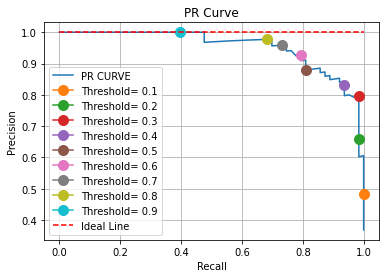

In [ ]:
plt.plot(recall,precision,label="PR CURVE")
tg_thres=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for thres in tg_thres:
  tg_index = np.argmin(np.abs(thresholds-thres))
  plt.plot(recall[tg_index],precision[tg_index],marker="o",markersize=10,label=f"Threshold= {thres}")
plt.plot([0,1],[1,1],linestyle="--",color="red",label="Ideal Line")
plt.legend()
plt.title("PR Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

In [ ]:
# AUC (Area Under the Curve)を計算する
auc(recall,precision)

0.9543523166632816

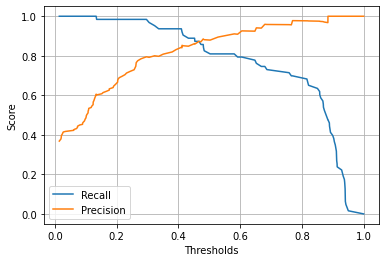

In [ ]:
plt.plot(np.append(thresholds,1),recall,label="Recall")
plt.plot(np.append(thresholds,1),precision,label="Precision")
plt.xlabel("Thresholds")
plt.ylabel("Score")
plt.grid()
plt.legend()
plt.show()
# しきい値が高い、すぐに異常と判定するので
# 高適合率(Precision)、低再現率(Recall)

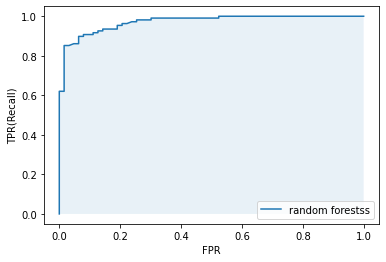

AUC: 0.9718


In [ ]:

rf_kakuritu = rf_cls.predict_proba(x_test)[:, 1]  # ランダムフォレストモデルで確率を出力

# ROC曲線を描写

fpr, tpr, thresholds = roc_curve(y_test, rf_kakuritu)
plt.plot(fpr, tpr, label='random forestss')
plt.fill_between(fpr, tpr, 0,  alpha=0.1)

plt.xlabel("FPR")
plt.ylabel("TPR(Recall)")
plt.legend()
plt.show()

# AUCの計算
print(f'AUC: {roc_auc_score(y_test, rf_kakuritu):.4f}')